Importing the libraries

In [1]:
import duckdb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

conn = duckdb.connect()

# 1. Analysing collisions by hour of the day

In [2]:
query = """
select
    crash_hour as hour_of_day,
    count(*) as collision_count,
    sum(number_of_persons_injured) as total_injuries,
    round(avg(number_of_persons_injured), 2) as avg_injuries_per_collision
from read_parquet('../output_data//transformed_data.parquet')
group by 1
order by 1
"""

hourly_df = conn.execute(query).df()

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Collision Count by Hour', 'Average Injuries per Collision'),
    horizontal_spacing=0.1
)

fig.add_trace(
    go.Bar(
        x=hourly_df['hour_of_day'],
        y=hourly_df['collision_count'],
        name="Collisions",
        marker_color='red',
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=hourly_df['hour_of_day'],
        y=hourly_df['avg_injuries_per_collision'],
        mode='lines+markers',
        name="Avg Injuries",
        line=dict(color='blue', width=3),
        marker=dict(size=8),
        showlegend=False
    ),
    row=1, col=2
)

fig.update_layout(
    title="NYC Hourly Collision Analysis",
    height=500
)

fig.update_xaxes(title_text="Hour of Day", row=1, col=1, tickmode='linear', dtick=1)
fig.update_xaxes(title_text="Hour of Day", row=1, col=2, tickmode='linear', dtick=1)
fig.update_yaxes(title_text="Number of Collisions", row=1, col=1)
fig.update_yaxes(title_text="Average Injuries", row=1, col=2)

fig.show()



In [11]:
fig.write_image(
    "./static_images/collision_by_hour.png",
    width=1200,
    height=700,
    scale=1
)

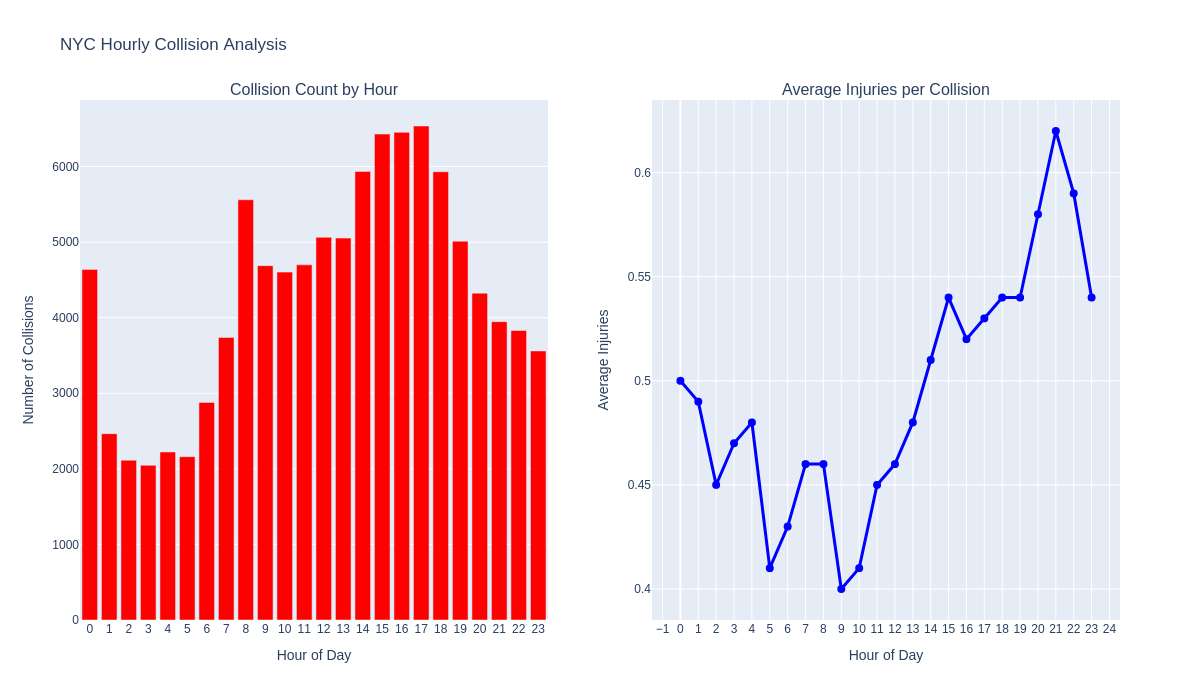

In [12]:
# Then display both the interactive version (for local) and static (for GitHub)
from IPython.display import Image, display
# Interactive for local
display(Image("./static_images/collision_by_hour.png"))  # Static for GitHub